In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [69]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.00,1140,4.00,1.00,1,1,3,1,0,1,0.00,63.00,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.00,8370,4.00,1.00,1,1,2,1,0,1,0.00,42.00,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.00,8370,4.00,1.00,1,1,2,1,0,1,0.00,42.00,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.00,8370,4.00,1.00,3,1,2,1,0,1,0.00,150.00,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.00,1020,4.00,2.00,2,0,3,0,0,1,0.00,120.00,3158.33


In [70]:
df.shape

(13893, 16)

### Dealing with Outliers

#### Price

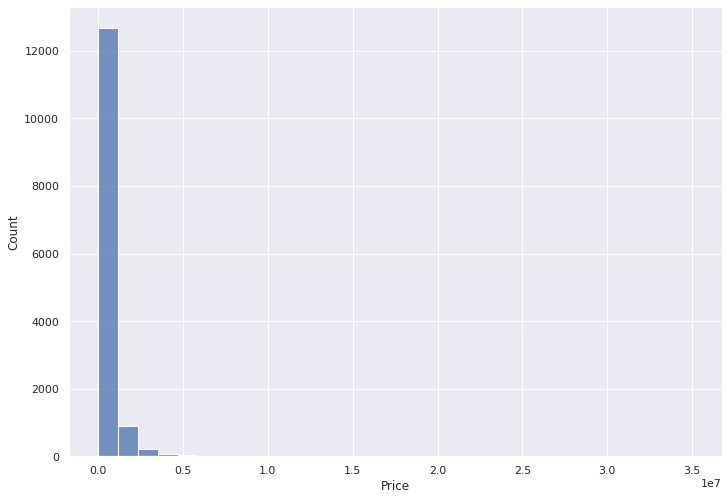

In [71]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(df["Price"], bins=30);

In [72]:
# This variable is equal to the 99th percentile of the 'Price' variable
q = df["Price"].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df[df["Price"] < q]
# In this way we have removed the top 1% of the data about 'Price'
data_1.describe(include="all")

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,13751.00,13751,13751,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,13751.00,10960.00,10960.00
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,HOUSE,VILLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7572,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9504520.27,NaN,NaN,503751.55,4705.97,3.76,0.77,3.30,0.04,2.94,0.72,0.28,0.56,1158.46,228.76,2792.31
std,343095.43,NaN,NaN,446192.96,3006.75,1.63,0.74,2.98,0.20,0.78,0.45,0.45,0.50,7166.30,290.41,2707.81
min,4611027.00,NaN,NaN,950.00,1000.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,7.86
25%,9475253.50,NaN,NaN,240000.00,1933.00,2.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,102.00,1779.58
50%,9616501.00,NaN,NaN,350000.00,4000.00,4.00,1.00,3.00,0.00,3.00,1.00,0.00,1.00,0.00,168.00,2489.47
75%,9686911.00,NaN,NaN,595000.00,7870.00,6.00,1.00,4.00,0.00,4.00,1.00,1.00,1.00,633.00,279.00,3333.33


/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


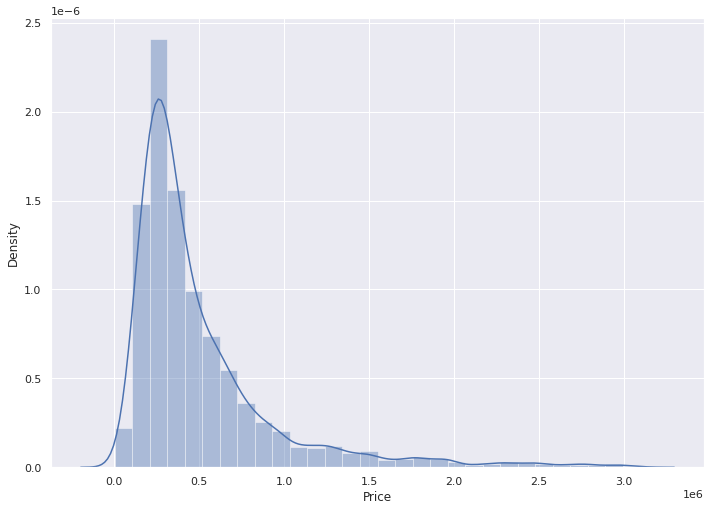

In [73]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(data_1["Price"], bins=30)
plt.show()

In [74]:
data_1["Living area"].isnull().sum()

2791

#### Living area

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Living area', ylabel='Density'>

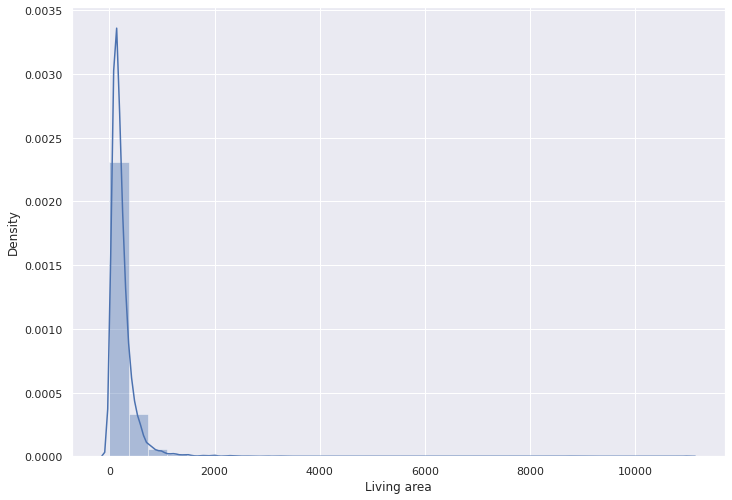

In [75]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(df["Living area"], bins=30)

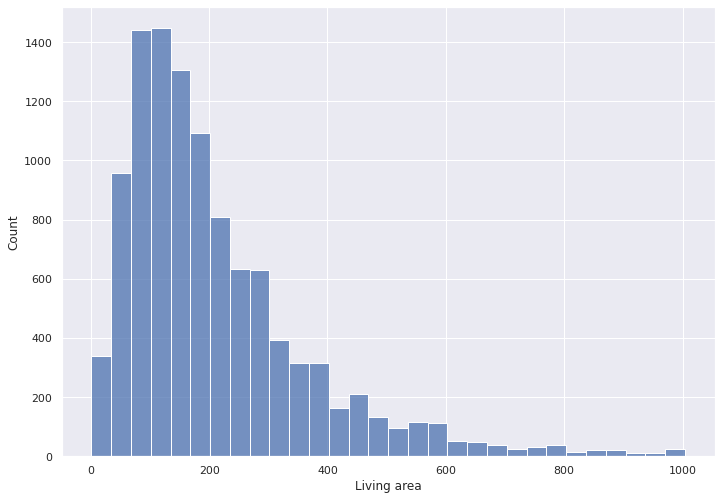

In [76]:
q = data_1["Living area"].quantile(0.99)
data_2 = data_1[data_1["Living area"] < q]
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(data_2["Living area"], bins=30);

In [77]:
data_2["Living area"].isnull().sum()

0

#### Surface of the plot

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


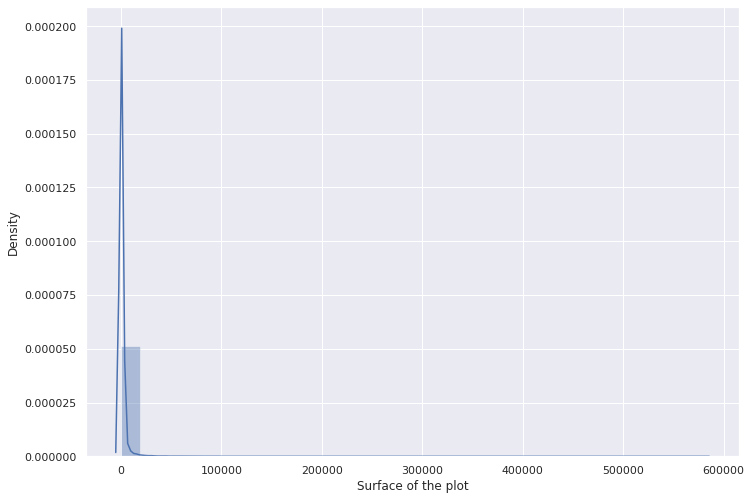

In [78]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(df["Surface of the plot"], bins=30);

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


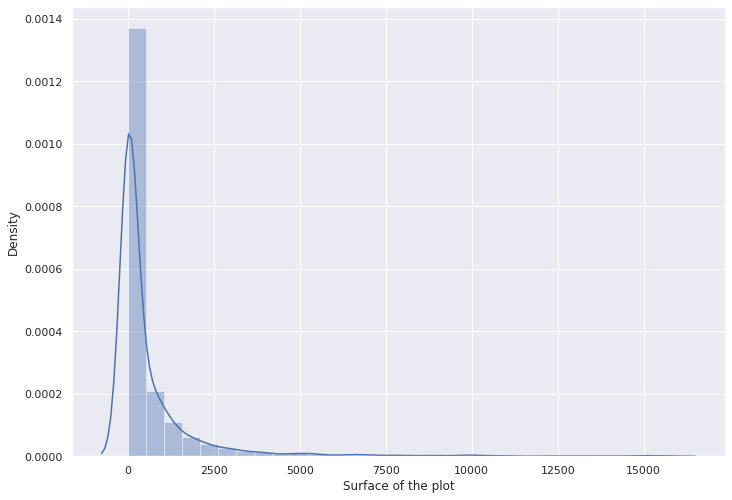

In [79]:
q = data_2["Surface of the plot"].quantile(0.99)
data_3 = data_2[data_2["Surface of the plot"] < q]
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(data_3["Surface of the plot"], bins=30);

#### Number of frontages

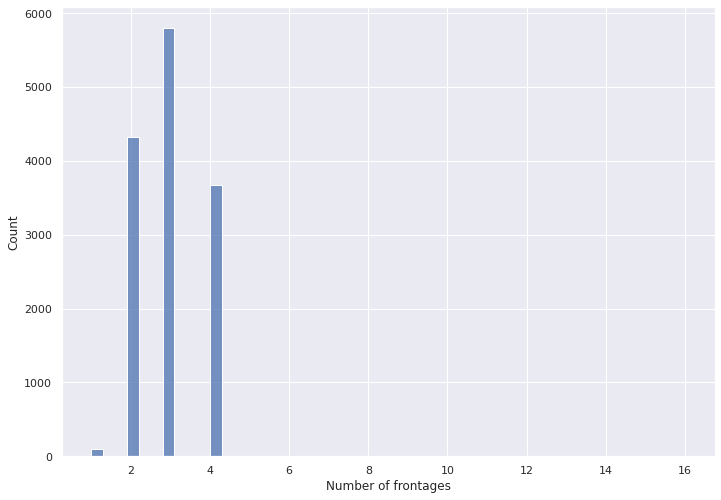

In [80]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(df["Number of frontages"], bins=50);

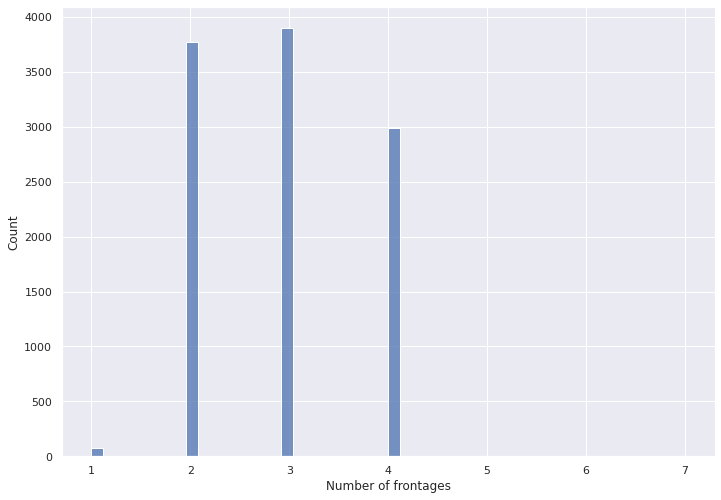

In [81]:
q = data_3["Number of frontages"].quantile(0.99)
data_4 = data_3[data_3["Number of frontages"] < q]
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(data_3["Number of frontages"], bins=50);

#### Bedrooms

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


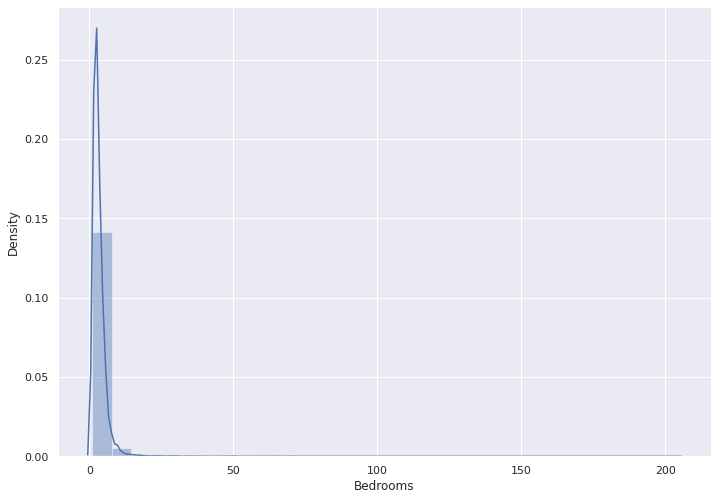

In [82]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(df["Bedrooms"], bins=30);

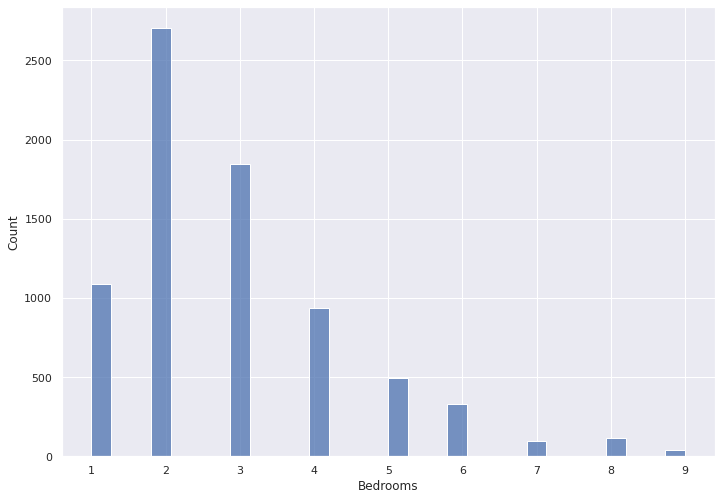

In [83]:
q = data_4["Bedrooms"].quantile(0.99)
data_5 = data_4[data_4["Bedrooms"] < q]
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.histplot(data_5["Bedrooms"], bins=30);

In [84]:
data_cleaned = data_5.reset_index(drop=True)
data_cleaned.describe(include="all")

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,7642.00,7642,7642,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00,7642.00
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,APARTMENT,DUPLEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4358,1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9522128.71,NaN,NaN,441035.10,4449.05,3.96,0.85,2.90,0.05,2.49,0.66,0.27,0.62,251.19,179.78,2890.64
std,306840.00,NaN,NaN,376871.58,3069.01,1.62,0.74,1.56,0.22,0.52,0.47,0.44,0.48,935.35,137.79,1753.77
min,4611027.00,NaN,NaN,10000.00,1000.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,12.00,65.36
25%,9487963.00,NaN,NaN,228000.00,1650.00,2.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,90.00,1824.57
50%,9620074.50,NaN,NaN,325000.00,3500.00,4.00,1.00,3.00,0.00,3.00,1.00,0.00,1.00,0.00,140.00,2587.09
75%,9688265.75,NaN,NaN,525000.00,8000.00,6.00,1.00,4.00,0.00,3.00,1.00,1.00,1.00,170.00,230.00,3475.61


In [85]:
axis_name = [
    "Building condition",
    "Kitchen type",
    "Bedrooms",
    "Number of frontages",
    "Surface of the plot",
    "Living area",
]

Text(0.5, 1.0, 'Price and Surface of the plot')

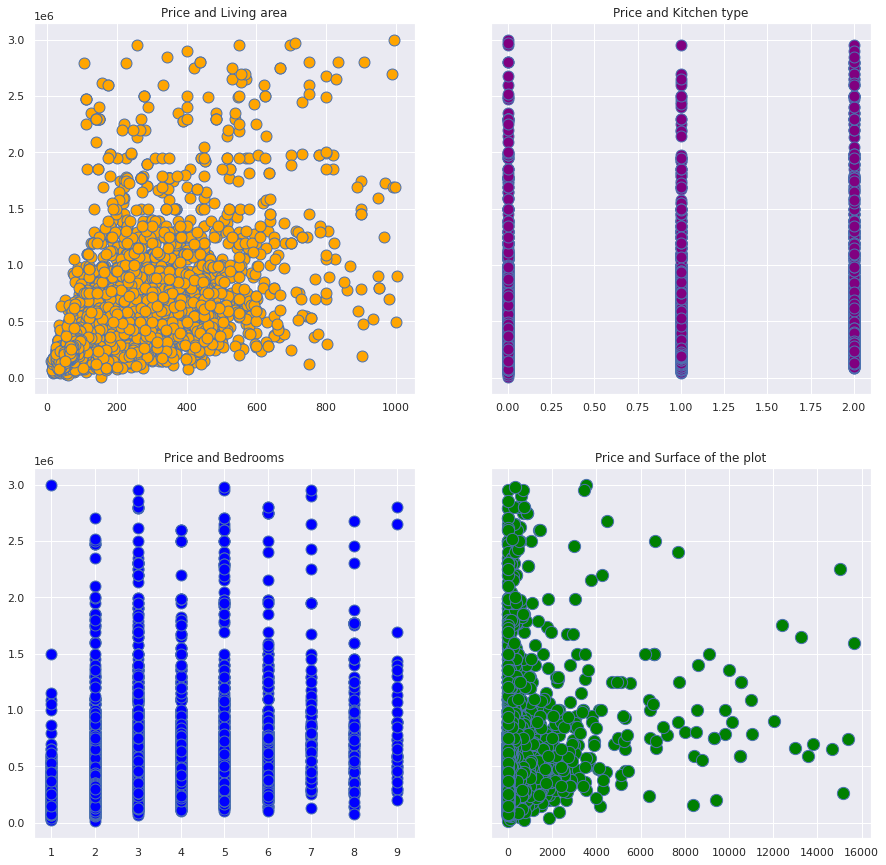

In [86]:
f, axs = plt.subplots(
    2, 2, sharey=True, figsize=(15, 15)
)  # sharey -> share 'Price' as y
axs[0, 0].scatter(
    data_cleaned["Living area"],
    data_cleaned["Price"],
    color="orange",
    edgecolor="b",
    s=120,
)
axs[0, 0].set_title("Price and Living area")
axs[0, 1].scatter(
    data_cleaned["Kitchen type"],
    data_cleaned["Price"],
    color="purple",
    edgecolor="b",
    s=120,
)
axs[0, 1].set_title("Price and Kitchen type")
axs[1, 0].scatter(
    data_cleaned["Bedrooms"], data_cleaned["Price"], color="blue", edgecolor="b", s=120
)
axs[1, 0].set_title("Price and Bedrooms")
axs[1, 1].scatter(
    data_cleaned["Surface of the plot"],
    data_cleaned["Price"],
    color="green",
    edgecolor="b",
    s=150,
)
axs[1, 1].set_title("Price and Surface of the plot")

In [87]:
data_cleaned["log_area"] = data_cleaned["Living area"].map(np.log)

In [88]:
# Then we add it to our data frame
data_cleaned["log_price"] = data_cleaned["Price"].map(np.log)
data_cleaned

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2,log_area,log_price
0,9729720,APARTMENT,PENTHOUSE,179000.00,1140,4.00,1.00,1,1,3,1,0,1,0.00,63.00,2841.27,4.14,12.10
1,9729785,APARTMENT,PENTHOUSE,255000.00,8370,4.00,1.00,1,1,2,1,0,1,0.00,42.00,6071.43,3.74,12.45
2,9729784,APARTMENT,PENTHOUSE,255000.00,8370,4.00,1.00,1,1,2,1,0,1,0.00,42.00,6071.43,3.74,12.45
3,9729780,APARTMENT,PENTHOUSE,620000.00,8370,4.00,1.00,3,1,2,1,0,1,0.00,150.00,4133.33,5.01,13.34
4,9727201,APARTMENT,PENTHOUSE,379000.00,1020,4.00,2.00,2,0,3,0,0,1,0.00,120.00,3158.33,4.79,12.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7995366,APARTMENT,SERVICE_FLAT,242000.00,2880,2.00,2.00,1,0,3,1,0,1,0.00,62.00,3903.23,4.13,12.40
7638,9540791,APARTMENT,SERVICE_FLAT,369000.00,8400,6.00,0.00,1,0,2,1,0,1,0.00,55.00,6709.09,4.01,12.82
7639,8041977,APARTMENT,SERVICE_FLAT,217000.00,9880,6.00,0.00,1,0,3,1,0,1,0.00,65.00,3338.46,4.17,12.29
7640,9459825,APARTMENT,SERVICE_FLAT,148500.00,9990,2.00,0.00,1,0,3,1,0,0,0.00,52.00,2855.77,3.95,11.91


Text(0.5, 1.0, 'log_price and Surface of the plot')

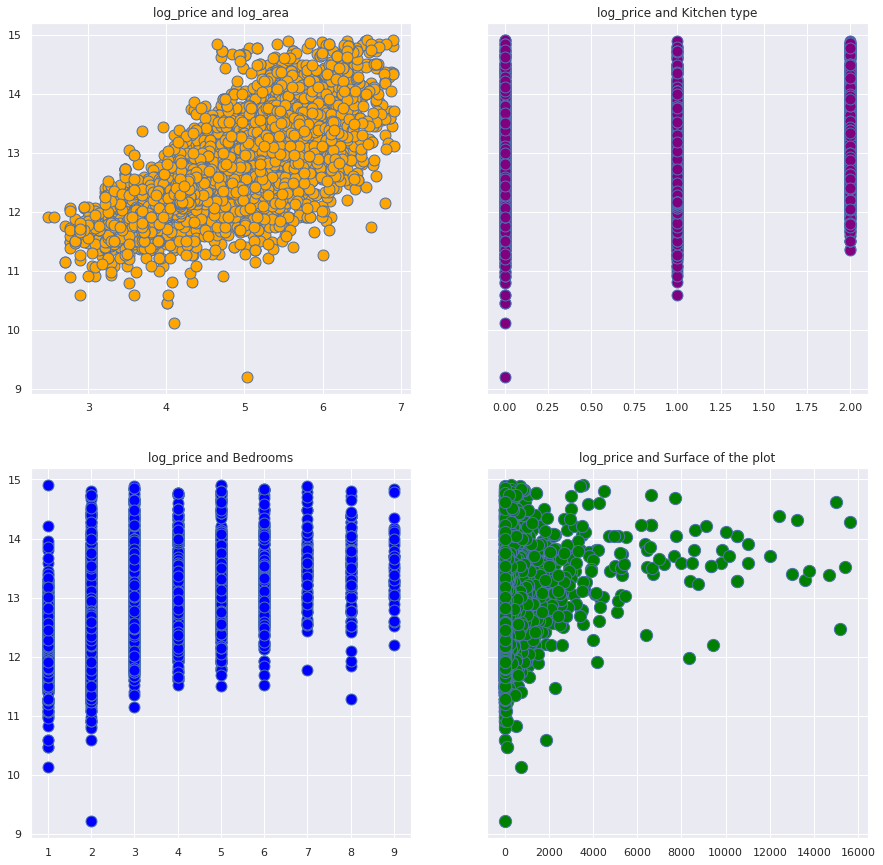

In [89]:
f, axs = plt.subplots(
    2, 2, sharey=True, figsize=(15, 15)
)  # sharey -> share "log_price' as y
axs[0, 0].scatter(
    data_cleaned["log_area"],
    data_cleaned["log_price"],
    color="orange",
    edgecolor="b",
    s=120,
)
axs[0, 0].set_title("log_price and log_area")
axs[0, 1].scatter(
    data_cleaned["Kitchen type"],
    data_cleaned["log_price"],
    color="purple",
    edgecolor="b",
    s=120,
)
axs[0, 1].set_title("log_price and Kitchen type")
axs[1, 0].scatter(
    data_cleaned["Bedrooms"], data_cleaned["log_price"], color="blue", edgecolor="b", s=120
)
axs[1, 0].set_title("log_price and Bedrooms")
axs[1, 1].scatter(
    data_cleaned["Surface of the plot"],
    data_cleaned["log_price"],
    color="green",
    edgecolor="b",
    s=150,
)
axs[1, 1].set_title("log_price and Surface of the plot")

In [90]:
data_cleaned['log_price'].max()

14.914122846632385

In [91]:
data_cleaned = data_cleaned.drop(["Price", 'Living area'], axis=1)

### Multicolineratiy

In [92]:
data_cleaned.columns.values

array(['Immoweb ID', 'Property type', 'property sub-type', 'Post code',
       'Building condition', 'Kitchen type', 'Bedrooms', 'Furnished',
       'Number of frontages', 'Swimming pool', 'Garden', 'Terrace',
       'Surface of the plot', 'price/m2', 'log_area', 'log_price'],
      dtype=object)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[
    [
        "Building condition",
        "Kitchen type",
        "Bedrooms",
        "Furnished",
        "Number of frontages",
        "Swimming pool",
        "Garden",
        "Terrace",
        "Surface of the plot",
        "log_area"
    ]
]
vif = pd.DataFrame()
vif["VIF"] = [
    variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])
]
vif["Features"] = variables.columns

In [94]:
vif

,VIF,Features
0,7.87,Building condition
1,2.78,Kitchen type
2,7.48,Bedrooms
3,1.08,Furnished
4,18.60,Number of frontages
5,3.06,Swimming pool
6,1.46,Garden
7,2.80,Terrace
8,1.17,Surface of the plot
9,36.66,log_area


In [95]:
data_no_multicollinearity = data_cleaned.drop(
    ["Number of frontages", "Building condition"], axis=1
)
data_no_multicollinearity

,Immoweb ID,Property type,property sub-type,Post code,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,price/m2,log_area,log_price
0,9729720,APARTMENT,PENTHOUSE,1140,1.00,1,1,1,0,1,0.00,2841.27,4.14,12.10
1,9729785,APARTMENT,PENTHOUSE,8370,1.00,1,1,1,0,1,0.00,6071.43,3.74,12.45
2,9729784,APARTMENT,PENTHOUSE,8370,1.00,1,1,1,0,1,0.00,6071.43,3.74,12.45
3,9729780,APARTMENT,PENTHOUSE,8370,1.00,3,1,1,0,1,0.00,4133.33,5.01,13.34
4,9727201,APARTMENT,PENTHOUSE,1020,2.00,2,0,0,0,1,0.00,3158.33,4.79,12.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7995366,APARTMENT,SERVICE_FLAT,2880,2.00,1,0,1,0,1,0.00,3903.23,4.13,12.40
7638,9540791,APARTMENT,SERVICE_FLAT,8400,0.00,1,0,1,0,1,0.00,6709.09,4.01,12.82
7639,8041977,APARTMENT,SERVICE_FLAT,9880,0.00,1,0,1,0,1,0.00,3338.46,4.17,12.29
7640,9459825,APARTMENT,SERVICE_FLAT,9990,0.00,1,0,1,0,0,0.00,2855.77,3.95,11.91


### Categorical data encoding

In [96]:
data_no_multicollinearity["Post code"].astype(str)

0       1140
1       8370
2       8370
3       8370
4       1020
        ... 
7637    2880
7638    8400
7639    9880
7640    9990
7641    3500
Name: Post code, Length: 7642, dtype: object

In [97]:
post_code_stat = data_no_multicollinearity["Post code"].value_counts(ascending=False)
post_code_stat

1000    189
1050    182
2000    164
1070    139
8300    139
1180    135
1030    133
9000    123
4000    119
2018    105
1080    104
8400     91
9300     89
3000     85
8370     84
2060     80
1060     78
1200     70
1040     70
4020     69
8000     66
1190     63
8434     58
7500     57
1090     56
8620     54
8670     52
4800     52
3500     51
8430     51
1500     49
2100     48
1160     48
1140     46
1150     45
2800     45
4100     44
1020     41
9700     39
7000     38
2610     37
1420     37
9100     36
2140     36
8800     36
2300     35
8500     35
2660     34
2170     33
2500     33
6030     33
2600     33
1210     31
1800     30
1082     29
4500     29
9200     29
3800     29
5500     28
9600     27
5000     26
7700     25
6200     25
1081     25
1410     25
7100     24
6000     24
1930     24
3700     24
1480     23
8790     23
2550     23
8660     23
1120     23
8200     23
9280     23
1400     22
2640     22
2020     22
1300     22
3980     22
2880     22
2930     22
9160

In [98]:
print(
    "Total no of Poste code where data points are more than 10 = %s"
    % (len(post_code_stat[post_code_stat > 10]))
)
print(
    "Total no of Poste code where data points are less than 10 = %s"
    % (len(post_code_stat[post_code_stat <= 10]))
)

Total no of Poste code where data points are more than 10 = 167
Total no of Poste code where data points are less than 10 = 567


In [99]:
pc_stat_less_10 = post_code_stat[post_code_stat <= 10]
data_post_code = data_no_multicollinearity.copy()
data_post_code["Post code"] = data_no_multicollinearity["Post code"].apply(
    lambda x: "other" if x in pc_stat_less_10 else x
)
len(data_post_code["Post code"].unique())

168

In [100]:
data_no_pro_type = data_post_code.drop(
    columns=["Immoweb ID", "Property type", "price/m2"]
)

In [101]:
data_with_dummies = pd.get_dummies(data_no_pro_type, drop_first=True)

In [102]:
data_with_dummies.head()

,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,log_area,log_price,property sub-type_BUNGALOW,...,Post code_9550,Post code_9600,Post code_9620,Post code_9700,Post code_9800,Post code_9820,Post code_9880,Post code_9900,Post code_9940,Post code_other
0,1.00,1,1,1,0,1,0.00,4.14,12.10,0,...,0,0,0,0,0,0,0,0,0,0
1,1.00,1,1,1,0,1,0.00,3.74,12.45,0,...,0,0,0,0,0,0,0,0,0,0
2,1.00,1,1,1,0,1,0.00,3.74,12.45,0,...,0,0,0,0,0,0,0,0,0,0
3,1.00,3,1,1,0,1,0.00,5.01,13.34,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,2,0,0,0,1,0.00,4.79,12.85,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
data_with_dummies.columns.values

array(['Kitchen type', 'Bedrooms', 'Furnished', 'Swimming pool', 'Garden',
       'Terrace', 'Surface of the plot', 'log_area', 'log_price',
       'property sub-type_BUNGALOW', 'property sub-type_CASTLE',
       'property sub-type_CHALET', 'property sub-type_COUNTRY_COTTAGE',
       'property sub-type_DUPLEX',
       'property sub-type_EXCEPTIONAL_PROPERTY',
       'property sub-type_FARMHOUSE', 'property sub-type_FLAT_STUDIO',
       'property sub-type_GROUND_FLOOR', 'property sub-type_KOT',
       'property sub-type_LOFT', 'property sub-type_MANOR_HOUSE',
       'property sub-type_MANSION',
       'property sub-type_MIXED_USE_BUILDING',
       'property sub-type_PENTHOUSE', 'property sub-type_SERVICE_FLAT',
       'property sub-type_TOWN_HOUSE', 'property sub-type_TRIPLEX',
       'property sub-type_VILLA', 'Post code_1020', 'Post code_1030',
       'Post code_1040', 'Post code_1050', 'Post code_1060',
       'Post code_1070', 'Post code_1080', 'Post code_1081',
       'Post code_10

In [104]:
df_reg = data_with_dummies.copy()

In [105]:
df_reg.shape

(7642, 195)

## Linear Regression Model

Declare the features and targets

In [106]:
X = df_reg.drop(["log_price"], axis=1)
y = df_reg["log_price"]

In [107]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (7642, 194)
Shape of y:  (7642,)


### Splitting the data set

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=365
)

In [109]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6113, 194)
Shape of X_test:  (1529, 194)
Shape of y_train:  (6113,)
Shape of y_test:  (1529,)


### Standardization and Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X_train)

StandardScaler()

In [111]:
features_scal = scaler.transform(X_train)

In [112]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.7810526031185119

In [113]:
y_hat = regressor.predict(X_train)

In [114]:
print(min(y_hat))

10.697673955947668


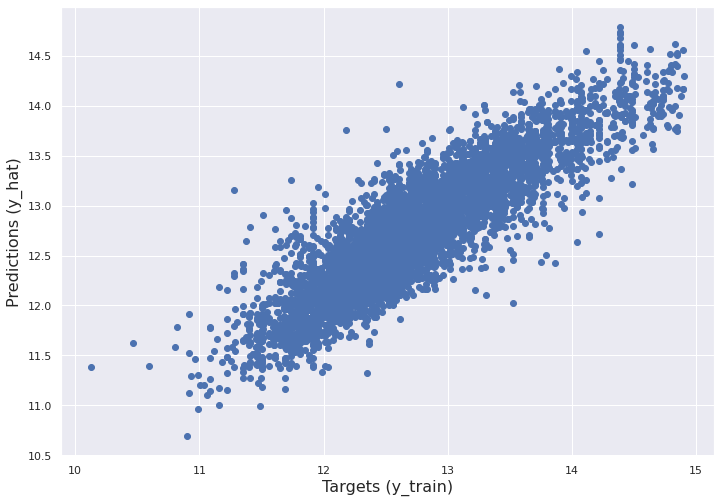

In [115]:
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=16)
plt.ylabel("Predictions (y_hat)", size=16)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

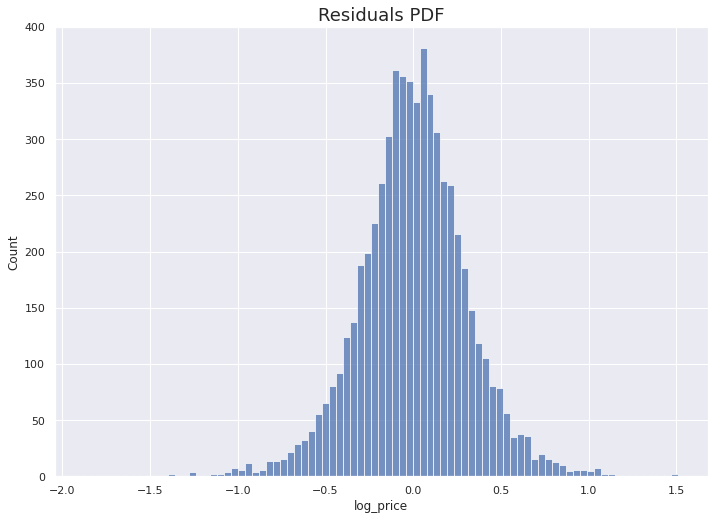

In [116]:
# We can plot the PDF(Probability density function) of the residuals and check for anomalies
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [117]:
scaler.transform(X_test)

array([[-1.15655676,  0.71044226, -0.23425391, ..., -0.0495966 ,
        -0.03839848,  1.74902743],
       [ 0.20045504, -0.57141534, -0.23425391, ..., -0.0495966 ,
        -0.03839848, -0.57174632],
       [-1.15655676,  1.35137106, -0.23425391, ..., -0.0495966 ,
        -0.03839848, -0.57174632],
       ...,
       [ 0.20045504,  1.35137106, -0.23425391, ..., -0.0495966 ,
        -0.03839848, -0.57174632],
       [ 0.20045504,  0.71044226, -0.23425391, ..., -0.0495966 ,
        -0.03839848, -0.57174632],
       [-1.15655676,  1.99229986, -0.23425391, ..., -0.0495966 ,
        -0.03839848, -0.57174632]])

In [118]:
regressor.score(X_test, y_test)

0.7229530515885185

In [119]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

y_hat = regressor.predict(X_train)
rmse = np.sqrt(MSE(y_train, y_hat))
r2 = r2_score(y_train, y_hat)

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.3127014279263253
R2 score is 0.7810526031185119


The model performance for testing set
--------------------------------------
RMSE is 0.3386545774189546
R2 score is 0.7229530515885185


In [120]:
regressor.coef_

array([ 5.45922472e-02,  2.37743463e-02,  8.26086156e-02, -2.64667376e-02,
        4.82245723e-02,  7.93909719e-02,  5.08962658e-05,  6.72721999e-01,
        9.44946164e-02, -1.07927207e-01, -3.77479978e-01, -1.79584810e-01,
        8.07736902e-02,  1.46589272e-01, -2.74755551e-01, -4.59460606e-02,
        9.79112660e-02,  4.78109451e-02,  1.08130405e-01, -4.54532095e-02,
        1.62177212e-02, -1.12074893e-01,  3.54756286e-01,  2.26596913e-01,
       -5.33362316e-02, -4.42469290e-03,  1.59083153e-01, -3.94687949e-01,
       -2.50227744e-01,  2.98856383e-02,  1.15659506e-01, -8.09812635e-02,
       -2.96029435e-01, -4.41147719e-01, -4.05977554e-01, -2.98933217e-01,
       -2.43008111e-01, -3.24250924e-01, -3.53923982e-01, -2.54179417e-01,
        1.69304868e-02, -3.36575677e-02,  2.15767134e-02, -2.21430834e-01,
       -1.23054848e-01, -3.24583521e-01, -3.44135689e-01, -1.57416204e-01,
       -3.19318577e-01, -1.33153966e-01, -4.09003753e-01, -5.39933963e-01,
       -3.08656055e-01, -

In [121]:
reg_summary = pd.DataFrame(X.columns.values, columns=["Features"])
reg_summary["Weights"] = regressor.coef_
reg_summary

,Features,Weights
0,Kitchen type,0.05
1,Bedrooms,0.02
2,Furnished,0.08
3,Swimming pool,-0.03
4,Garden,0.05
5,Terrace,0.08
6,Surface of the plot,0.00
7,log_area,0.67
8,property sub-type_BUNGALOW,0.09
9,property sub-type_CASTLE,-0.11


In [122]:
y_hat_test = regressor.predict(X_test)

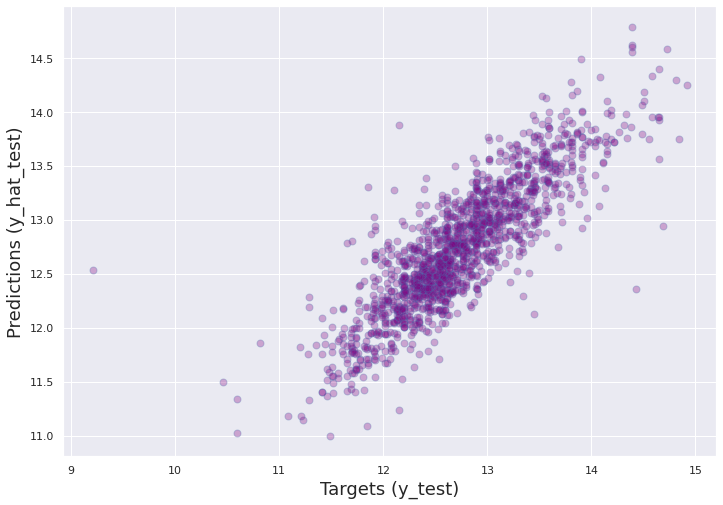

In [123]:
plt.scatter(y_test, y_hat_test, alpha=0.3, color="purple", edgecolor="b", s=50)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.show()

In [124]:
def coef_determination(y, pred):
    u = ((y - y_hat) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

In [125]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_pf.head()

,Prediction
0,485561.42
1,395147.00
2,505954.87
3,317488.89
4,268548.39


In [126]:
df_pf["Target"] = np.exp(y_test)
y_test = y_test.reset_index(drop=True)
y_test.head()

0   12.89
1   12.79
2   12.89
3   12.81
4   12.63
Name: log_price, dtype: float64

In [127]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Prediction,Target
0,485561.42,395000.00
1,395147.00,360000.00
2,505954.87,395000.00
3,317488.89,365000.00
4,268548.39,305000.00
...,...,...
1524,1172570.20,1450000.00
1525,295784.67,249000.00
1526,667885.90,600000.00
1527,731075.36,750000.00


In [128]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]

In [129]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"] / df_pf["Target"] * 100)
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_pf

,Prediction,Target,Residual,Difference%
0,485561.42,395000.00,-90561.42,22.93
1,395147.00,360000.00,-35147.00,9.76
2,505954.87,395000.00,-110954.87,28.09
3,317488.89,365000.00,47511.11,13.02
4,268548.39,305000.00,36451.61,11.95
...,...,...,...,...
1524,1172570.20,1450000.00,277429.80,19.13
1525,295784.67,249000.00,-46784.67,18.79
1526,667885.90,600000.00,-67885.90,11.31
1527,731075.36,750000.00,18924.64,2.52


In [130]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1529.00,1529.00,1529.00,1529.00
mean,407602.29,422135.78,14533.49,27.72
std,273006.78,339115.00,198004.44,73.96
min,59832.21,10000.00,-875238.89,0.03
25%,231939.59,225000.00,-60246.87,8.95
50%,331097.94,315000.00,-1144.24,18.72
75%,504320.37,499000.00,60916.42,34.02
max,2640710.11,3000000.00,1983211.57,2686.41


In [131]:
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=["Difference%"]).head(100)

,Prediction,Target,Residual,Difference%
284,424860.37,425000.00,139.63,0.03
451,279862.15,280000.00,137.85,0.05
492,204272.76,204000.00,-272.76,0.13
1036,210360.55,210000.00,-360.55,0.17
973,89744.50,89900.00,155.50,0.17
1086,89744.50,89900.00,155.50,0.17
1191,197650.78,198000.00,349.22,0.18
305,374262.90,375000.00,737.10,0.20
1342,195424.68,195000.00,-424.68,0.22
1325,275633.19,275000.00,-633.19,0.23


In [132]:
df_pf.sort_values(by=["Difference%"]).tail(100)

,Prediction,Target,Residual,Difference%
370,270919.62,165000.00,-105919.62,64.19
1058,343473.25,209000.00,-134473.25,64.34
532,468627.36,285000.00,-183627.36,64.43
1451,824547.11,500000.00,-324547.11,64.91
1069,218376.72,625000.00,406623.28,65.06
1324,255953.39,155000.00,-100953.39,65.13
111,629323.85,380000.00,-249323.85,65.61
851,152639.35,92000.00,-60639.35,65.91
449,164253.65,99000.00,-65253.65,65.91
572,779367.14,2300000.00,1520632.86,66.11


In [133]:
df_pf[df_pf["Difference%"] < 20.0].value_counts().count()

803

In [134]:
df_reg.to_csv("data/data_after_regression.csv")